In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from calendar import month_abbr

In [2]:
# Import csvs of books for each year
df2022 = pd.read_csv('../2022/books.csv', sep='|')
df2023 = pd.read_csv('../2023/books.csv', sep='|')
# Add year column
df2022.insert(0,'Year',2022)
df2023.insert(0,'Year',2023)
# Combine dataframes into bigdf of all years
bigdf = pd.concat([df2022,df2023])
# Change dates into datetime format
bigdf['Date Finished'] = pd.to_datetime(bigdf['Date Finished'], format='%m/%d/%Y')
# Add a fake date, with the year '2000', that can be used to plot based on day of year
bigdf['fakedate'] = list(map(lambda d: d.replace(year=2000), bigdf['Date Finished']))
bigdf['month'] = list(map(lambda d: d.strftime('%b'), bigdf['fakedate']))
bigdf['monthnum'] = list(map(lambda d: int(d.strftime('%m')), bigdf['fakedate']))
bigdf

,Year,Title,Author,Date Finished,Category,Genre,Year Written,Country,Series,Gender,fakedate,month,monthnum
0,2022,Silent Parade,Keigo Higashino,2022-01-02,Fiction,Mystery,2018,Japan,Detective Galileo,Male,2000-01-02,Jan,1
1,2022,The Name of the Rose,Umberto Eco,2022-01-19,Fiction,Mystery,1980,Italy,NaN,Male,2000-01-19,Jan,1
2,2022,"Hellboy Omnibus, Vol 1: Seed of Destruction",Mike Mingola,2022-01-20,Comics,Horror,2018,USA,Hellboy,Male,2000-01-20,Jan,1
3,2022,"Hellboy: The Complete Short Stories, Vol 1",Mike Mingola,2022-01-26,Comics,Horror,2018,USA,Hellboy,Male,2000-01-26,Jan,1
4,2022,"Hellboy: The Complete Short Stories, Vol 2",Mike Mingola,2022-01-31,Comics,Horror,2018,USA,Hellboy,Male,2000-01-31,Jan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,2023,"The World Keeps Ending, and the World Goes On",Franny Choi,2023-12-07,Poetry,Lit,2022,USA,NaN,Female,2000-12-07,Dec,12
44,2023,Home Stretch,Graham Norton,2023-12-08,Fiction,Lit,2020,Ireland,NaN,Male,2000-12-08,Dec,12
45,2023,Novelist as a Vocation,Haruki Murakami,2023-12-13,Non-fiction,Essays,2015,Japan,NaN,Male,2000-12-13,Dec,12
46,2023,A Visit from the Goon Squad,Jennifer Egan,2023-12-19,Fiction,Lit,2010,USA,Goon Squad,Female,2000-12-19,Dec,12


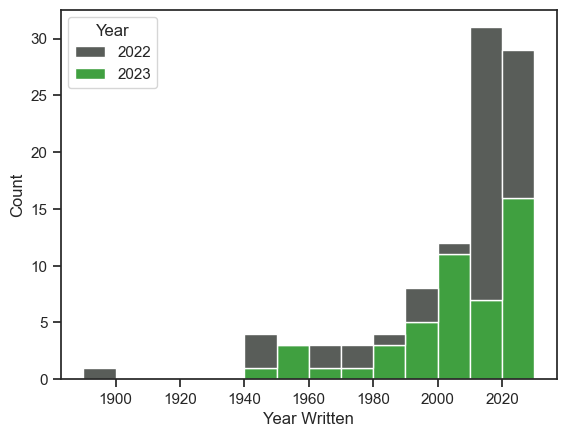

In [3]:
sns.set_theme(style='ticks')
sns.histplot(
    bigdf,
    x='Year Written', hue='Year',
    bins=[1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030],
    multiple='stack',
    palette='dark:green',
    linewidth=1
)
plt.show()

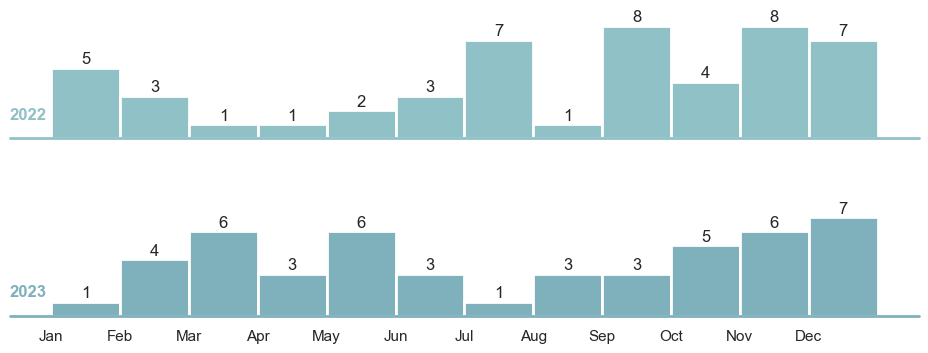

In [4]:
###
# Books per month, year over year
###

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(bigdf, row='Year', hue='Year', height=2, aspect=5, palette=pal)
g.map(sns.histplot, 'monthnum', binwidth=1, binrange=[1,13], clip_on=False, fill=True, legend=False, alpha=1, linewidth=2)
g.refline(y=0, linewidth=2, linestyle='-', color=None, clip_on=False)

def label (x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color, ha='left', va='center', transform=ax.transAxes)

g.map(label, 'Year')

g.figure.subplots_adjust(hspace=-.25)
                        
g.set_titles('')

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, padding=1)
        
g.figure.subplots_adjust(hspace=.5)

g.set(xticks=[1,2,3,4,5,6,7,8,9,10,11,12], xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], xlabel='', yticks=[], ylabel='')
g.despine(bottom=True, left=True)
    
plt.show()

ValueError: could not convert string to float: 'Silent Parade'

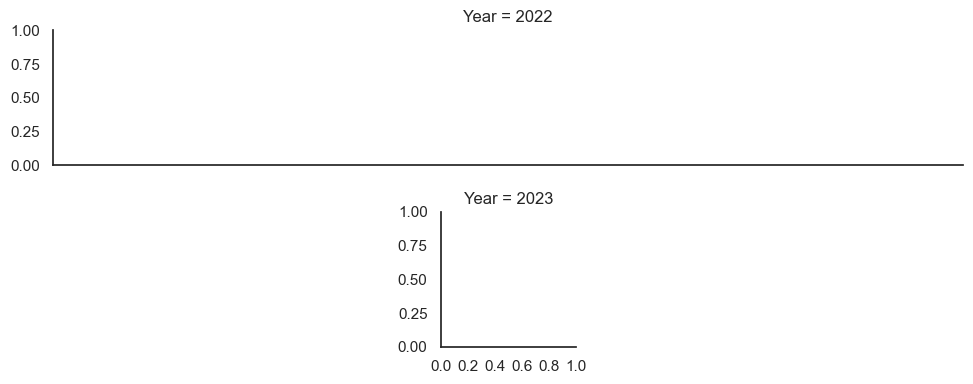

In [9]:
###
# Author Gender, Year over Year
###

g_gender = sns.FacetGrid(bigdf, row='Year', height=2, aspect=5, palette=pal)

plt.pie(bigdf,'Gender')

/var/folders/n7/21zljjl52z918gtct3ck49sr0000gn/T/ipykernel_13985/2554169182.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(bigdf, x='Date Finished', hue='Genre', kind='kde', multiple='stack')


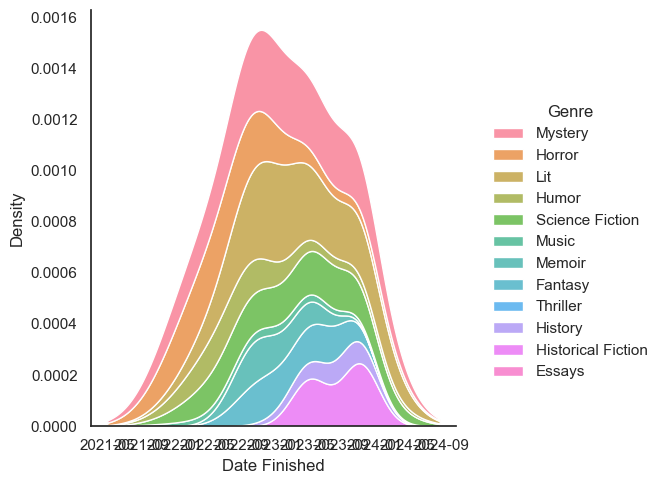

In [5]:
sns.displot(bigdf, x='Date Finished', hue='Genre', kind='kde', multiple='stack')
plt.show()

In [6]:
bigdf['Date Finished']

0    2022-01-02
1    2022-01-19
2    2022-01-20
3    2022-01-26
4    2022-01-31
        ...    
43   2023-12-07
44   2023-12-08
45   2023-12-13
46   2023-12-19
47   2023-12-22
Name: Date Finished, Length: 98, dtype: datetime64[ns]

In [7]:
bigdf.loc[bigdf['Genre'] == 'Mystery']['Date Finished']

0    2022-01-02
1    2022-01-19
5    2022-02-03
19   2022-07-13
25   2022-09-12
26   2022-09-26
32   2022-10-22
35   2022-11-03
45   2022-12-19
46   2022-12-19
0    2023-01-05
2    2023-02-11
3    2023-02-18
20   2023-06-13
22   2023-06-25
26   2023-08-26
29   2023-09-21
31   2023-10-09
33   2023-10-23
40   2023-11-24
Name: Date Finished, dtype: datetime64[ns]